<a href="https://colab.research.google.com/github/IamShubhamGupto/EDA_Meteorite_Landing_Sites/blob/master/IDSProjectv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns; sns.set(color_codes=True)  
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(9,7)


Run this if only basemap import throws error

In [ ]:
#install basemap manually
'''
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6'''

'\n!apt-get install libgeos-3.5.0\n!apt-get install libgeos-dev\n!pip install https://github.com/matplotlib/basemap/archive/master.zip\n!pip install pyproj==1.9.6'

Run this if only scikit import throws error

In [ ]:
'''!pip uninstall scikit-learn -y
!pip install Cython
!pip install git+git://github.com/scikit-learn/scikit-learn.git'''

'!pip uninstall scikit-learn -y\n!pip install Cython\n!pip install git+git://github.com/scikit-learn/scikit-learn.git'

In [ ]:
from mpl_toolkits.basemap import Basemap

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#fetch dataset
link = 'https://drive.google.com/open?id=1nLCVDfQy8NUu9NnD55meyj54ynkxiowp'
fluff, id = link.split('=')
print (id)

1nLCVDfQy8NUu9NnD55meyj54ynkxiowp


Getting rid of all invalid data as per documentation

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('meteorite-landings.csv')  
df = pd.read_csv('meteorite-landings.csv')

#remove known outliers from documentation
df = df[(df.reclat != 0.0) & (df.reclong != 0.0)]
df = df.drop(df[(df['year'] <=860)].index)
df = df.drop(df[(df['year'] >=2016)].index)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39274 entries, 0 to 45715
Data columns (total 10 columns):
name           39274 non-null object
id             39274 non-null int64
nametype       39274 non-null object
recclass       39274 non-null object
mass           39145 non-null float64
fall           39274 non-null object
year           39014 non-null float64
reclat         31959 non-null float64
reclong        31959 non-null float64
GeoLocation    31959 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.3+ MB


In [ ]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [ ]:
#check number of nans
df_nans = df[df.isna().any(axis=1)]
df_nans

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.666670, 2.333330)"
38,Angers,2301,Valid,L6,NaN,Fell,1822.0,47.46667,-0.55000,"(47.466670, -0.550000)"
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704.0,41.36667,2.16667,"(41.366670, 2.166670)"
93,Belville,5009,Valid,OC,NaN,Fell,1937.0,-32.33333,-64.86667,"(-32.333330, -64.866670)"
147,Bulls Run,5163,Valid,Iron?,2250.000,Fell,1964.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
45589,Yamato 984028,40648,Valid,Martian (shergottite),12.342,Found,1998.0,NaN,NaN,NaN
45660,Yambo no. 2,30346,Valid,L3,3.200,Found,1975.0,NaN,NaN,NaN
45692,Zacatecas (1969),30382,Valid,"Iron, IIIAB",6660.000,Found,1969.0,NaN,NaN,NaN
45698,Zapata County,30393,Valid,Iron,NaN,Found,1930.0,27.00000,-99.00000,"(27.000000, -99.000000)"


In [ ]:
df[df['nametype']=='Valid']

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [ ]:
#calculate the mean of valid nametype meteorites
df_valid = df[df['nametype'] == 'Valid']

mean_valid_mass = df_valid['mass'].mean(skipna=True)

Replace all NaNs of valid nametype meteorites with their mean

In [ ]:
df_valid[df_valid['mass'].isna()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.666670, 2.333330)"
38,Angers,2301,Valid,L6,NaN,Fell,1822.0,47.46667,-0.55000,"(47.466670, -0.550000)"
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704.0,41.36667,2.16667,"(41.366670, 2.166670)"
93,Belville,5009,Valid,OC,NaN,Fell,1937.0,-32.33333,-64.86667,"(-32.333330, -64.866670)"
172,Castel Berardenga,5292,Valid,Stone-uncl,NaN,Fell,1791.0,43.35000,11.50000,"(43.350000, 11.500000)"
...,...,...,...,...,...,...,...,...,...,...
38275,Wei-hui-fu (a),24231,Valid,Iron,NaN,Found,1931.0,NaN,NaN,NaN
38276,Wei-hui-fu (b),24232,Valid,Iron,NaN,Found,1931.0,NaN,NaN,NaN
38278,Weiyuan,24233,Valid,Mesosiderite,NaN,Found,1978.0,35.26667,104.31667,"(35.266670, 104.316670)"
41460,Yamato 792768,28117,Valid,CM2,NaN,Found,1979.0,-71.50000,35.66667,"(-71.500000, 35.666670)"


In [ ]:
#replace all NaNs with mean
df['mass'] = np.where((df['mass'].isna()) & (df['nametype'] == 'Valid'),mean_valid_mass,df['mass'])
#update df_valid
df_valid = df[df['nametype'] == 'Valid']

In [ ]:
df[df['nametype']=='Relict']

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
5182,Brunflo,5157,Relict,Relict H,NaN,Found,1980.0,63.11667,14.28333,"(63.116670, 14.283330)"
6810,David Glacier 92308,6614,Relict,Chondrite-fusion crust,1.7,Found,1992.0,-75.31667,162.00000,"(-75.316670, 162.000000)"
12627,Gove,52859,Relict,Relict iron,0.0,Found,1979.0,-12.26333,136.83833,"(-12.263330, 136.838330)"
15944,Gullhögen 001,44889,Relict,Relict OC,NaN,Found,2000.0,58.38333,13.80000,"(58.383330, 13.800000)"
17739,LaPaz Icefield 031037,35780,Relict,Fusion crust,0.1,Found,2003.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
31072,Österplana 060,56159,Relict,Relict OC,0.0,Found,2009.0,58.58333,13.43333,"(58.583330, 13.433330)"
31073,Österplana 061,56160,Relict,Relict OC,0.0,Found,2009.0,58.58333,13.43333,"(58.583330, 13.433330)"
31074,Österplana 062,56161,Relict,Relict OC,0.0,Found,2010.0,58.58333,13.43333,"(58.583330, 13.433330)"
31075,Österplana 063,56162,Relict,Relict OC,0.0,Found,2010.0,58.58333,13.43333,"(58.583330, 13.433330)"


Dropping all rows where reclat == 58.58333 and reclong == 13.433330 as there is a very low probablity of meteorites landing at the same position, hence false data.
This will increase the accuracy of mean relict mass calculated

In [ ]:

df = df.drop(df[df['GeoLocation'] == '(58.583330, 13.433330)'].index)
print(df)

             name     id  ...    reclong               GeoLocation
0          Aachen      1  ...    6.08333     (50.775000, 6.083330)
1          Aarhus      2  ...   10.23333    (56.183330, 10.233330)
2            Abee      6  ... -113.00000  (54.216670, -113.000000)
3        Acapulco     10  ...  -99.90000   (16.883330, -99.900000)
4         Achiras    370  ...  -64.95000  (-33.166670, -64.950000)
...           ...    ...  ...        ...                       ...
45711  Zillah 002  31356  ...   17.01850    (29.037000, 17.018500)
45712      Zinder  30409  ...    8.96667     (13.783330, 8.966670)
45713        Zlin  30410  ...   17.66667    (49.250000, 17.666670)
45714   Zubkovsky  31357  ...   41.50460    (49.789170, 41.504600)
45715  Zulu Queen  30414  ... -115.68333  (33.983330, -115.683330)

[39210 rows x 10 columns]


In [ ]:
#calculate the mean of valid nametype meteorites
df_relict = df[df['nametype'] == 'Relict']

mean_relict_mass = df_relict['mass'].mean(skipna=True)

In [ ]:
#replace all NaNs with mean
df['mass'] = np.where((df['mass'].isna()) & (df['nametype'] == 'Relict'),mean_relict_mass,df['mass'])
#update df_relict
df_relict = df[df['nametype'] == 'Relict']

In [ ]:
df_relict

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
5182,Brunflo,5157,Relict,Relict H,0.350333,Found,1980.0,63.11667,14.28333,"(63.116670, 14.283330)"
6810,David Glacier 92308,6614,Relict,Chondrite-fusion crust,1.700000,Found,1992.0,-75.31667,162.00000,"(-75.316670, 162.000000)"
12627,Gove,52859,Relict,Relict iron,0.000000,Found,1979.0,-12.26333,136.83833,"(-12.263330, 136.838330)"
15944,Gullhögen 001,44889,Relict,Relict OC,0.350333,Found,2000.0,58.38333,13.80000,"(58.383330, 13.800000)"
17739,LaPaz Icefield 031037,35780,Relict,Fusion crust,0.100000,Found,2003.0,NaN,NaN,NaN
18657,LaPaz Icefield 04531,34986,Relict,Chondrite-fusion crust,0.010000,Found,2004.0,NaN,NaN,NaN
18770,LaPaz Icefield 04644,34999,Relict,Chondrite-fusion crust,0.630000,Found,2004.0,NaN,NaN,NaN
20674,Lewis Cliff 87241,13702,Relict,Chondrite-fusion crust,0.500000,Found,1987.0,-84.34563,161.31058,"(-84.345630, 161.310580)"
23093,Meteorite Hills 001139,45809,Relict,Fusion crust,0.013000,Found,2000.0,-79.68333,159.75000,"(-79.683330, 159.750000)"
24322,Miller Range 05110,45810,Relict,Fusion crust,0.100000,Found,2005.0,NaN,NaN,NaN


In [ ]:
#fill NaN values in column year with mean
df['year'] = np.where(df['year'].isna(),round(df['year'].mean(skipna=True)),df['year'])

In [ ]:
#fill NaN values in column reclat with mean
df['reclat'] = np.where(df['reclat'].isna(),df['reclat'].mean(skipna=True),df['reclat'])
#fill NaN values in column reclong with mean
df['reclong'] = np.where(df['reclong'].isna(),df['reclong'].mean(skipna=True),df['reclong'])

In [ ]:
#fill NaN values in column GeoLocation with mean
df['GeoLocation'] = np.where(df['GeoLocation'].isna(),"("+df['reclat'].astype(str)+", "+df['reclong'].astype(str)+")",df['year'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39210 entries, 0 to 45715
Data columns (total 10 columns):
name           39210 non-null object
id             39210 non-null int64
nametype       39210 non-null object
recclass       39210 non-null object
mass           39210 non-null float64
fall           39210 non-null object
year           39210 non-null float64
reclat         39210 non-null float64
reclong        39210 non-null float64
GeoLocation    39210 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.3+ MB


In [ ]:
df_clean = df.copy()

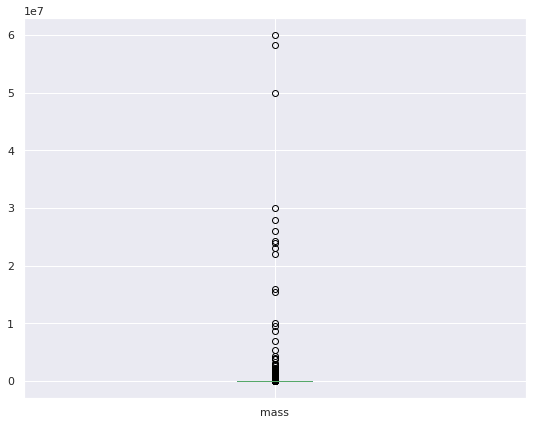

In [ ]:
bp1 = df_clean.boxplot(column=['mass'])

In [ ]:
#drop outliers in column mass
Q1 =  df_clean['mass'].quantile(0.25)
Q3 = df_clean['mass'].quantile(0.75)
IQR = Q3 - Q1
#below Q1
df_clean = df_clean.drop(df_clean[(df_clean['mass'] < Q1-1.5*IQR )].index)
#aboveQ3
df_clean = df_clean.drop(df_clean[(df_clean['mass'] > Q3+1.5*IQR)].index)

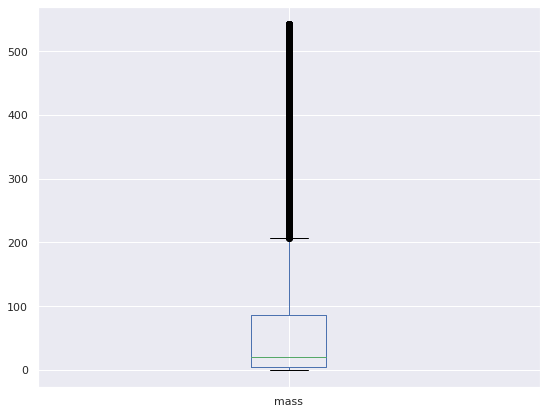

In [ ]:
bp1 = df_clean.boxplot(column=['mass'])

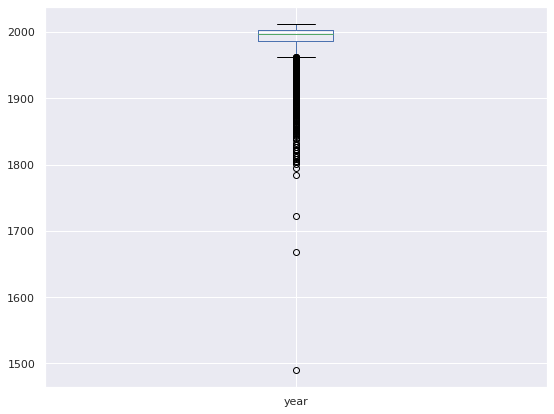

In [ ]:
bp2 = df_clean.boxplot(column=['year'])

In [ ]:
#drop outliers in column mass
Q1 =  df_clean['year'].quantile(0.25)
Q3 = df_clean['year'].quantile(0.75)
IQR = Q3 - Q1
#below Q1
df_clean = df_clean.drop(df_clean[(df_clean['year'] < Q1-1.5*IQR )].index)
#aboveQ3
df_clean = df_clean.drop(df_clean[ (df_clean['year'] > Q3+1.5*IQR)].index)

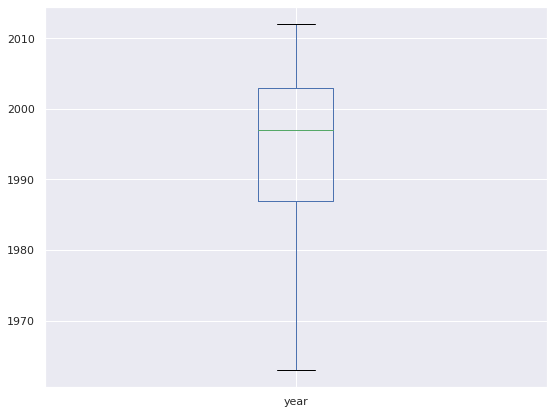

In [ ]:
bp2 = df_clean.boxplot(column=['year'])

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32627 entries, 22 to 45715
Data columns (total 10 columns):
name           32627 non-null object
id             32627 non-null int64
nametype       32627 non-null object
recclass       32627 non-null object
mass           32627 non-null float64
fall           32627 non-null object
year           32627 non-null float64
reclat         32627 non-null float64
reclong        32627 non-null float64
GeoLocation    32627 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 2.7+ MB


Run this block only to save the cleaned dataset to your drive

In [ ]:
'''
from google.colab import drive
drive.mount('drive')

df_clean.to_csv('meteorite-landings-cleaned.csv')
!cp meteorite-landings-cleaned.csv drive/My\ Drive/'''

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
'''min_max_scaler = preprocessing.MinMaxScaler()
mass_val = df[['mass']].values.astype(float)
year_val = df[['year']].values.astype(float)
#print(mass_val)
mass_scaled = min_max_scaler.fit_transform(mass_val)
year_scaled = min_max_scaler.fit_transform(year_val)
df_normalized = pd.DataFrame({'mass_scaled':mass_scaled[:,0],'year_scaled':year_scaled[:,0]})'''

scaler = preprocessing.StandardScaler()
#print(mass_val)
mass_scaled = scaler.fit_transform(df_clean[['mass']])
year_scaled = scaler.fit_transform(df_clean[['year']])
df_normalized = pd.DataFrame({'mass_scaled':mass_scaled[:,0],'year_scaled':year_scaled[:,0]})


In [ ]:
df.mean()

id         23382.896378
mass       15401.620808
year        1989.781816
reclat       -47.225268
reclong       73.251463
dtype: float64

In [ ]:
df_normalized.mean()

mass_scaled   -1.844508e-16
year_scaled    1.741014e-14
dtype: float64

In [ ]:
df.var()

id         2.333697e+08
mass       3.843328e+11
year       6.548200e+02
reclat     1.785659e+03
reclong    5.649869e+03
dtype: float64

In [ ]:
df_normalized.var()

mass_scaled    1.000031
year_scaled    1.000031
dtype: float64

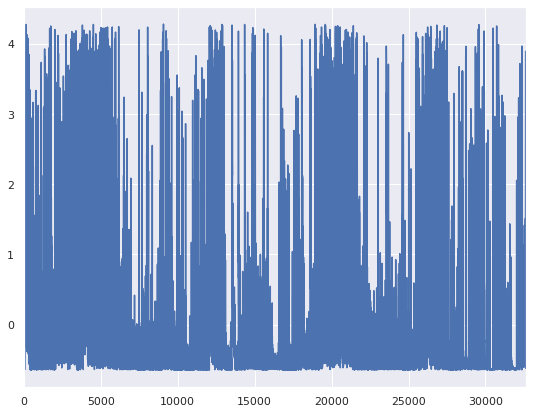

In [ ]:
df_normalized['mass_scaled'].plot()


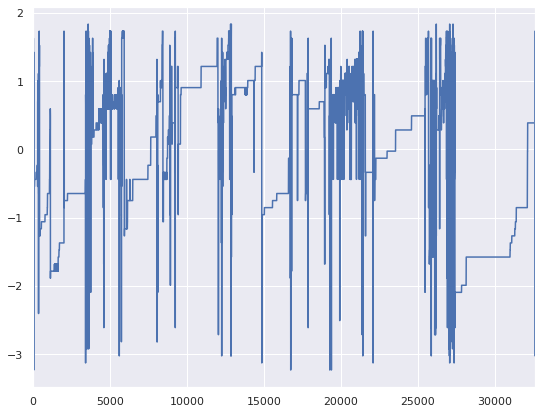

In [ ]:
df_normalized['year_scaled'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc32766c748>,
      dtype=object)

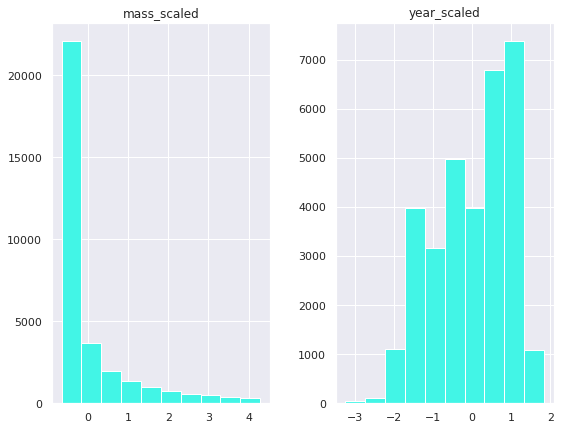

In [ ]:
df_normalized.hist(color='#42f5e6')

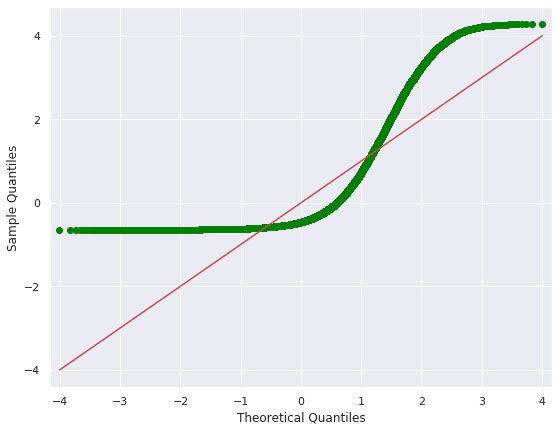

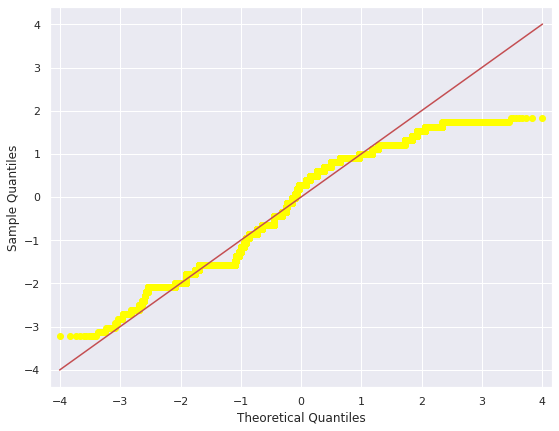

In [ ]:
# seed the random number generator
np.random.seed(100)
# q-q plot
qqplot(df_normalized['mass_scaled'], line='s',color="green")
qqplot(df_normalized['year_scaled'], line='s',color="yellow")
plt.show()

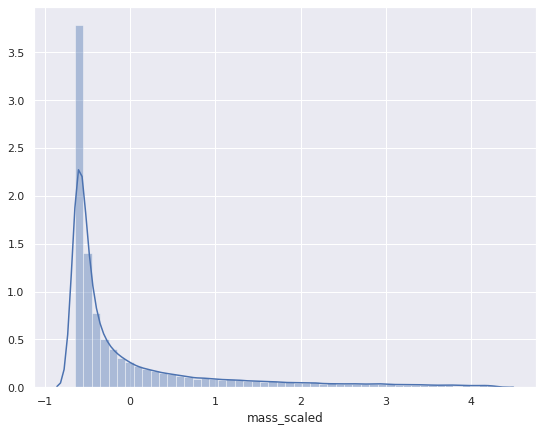

In [ ]:
sns.distplot(df_normalized['mass_scaled'])

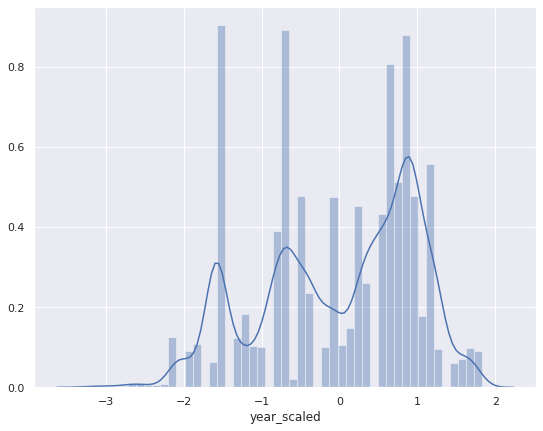

In [ ]:
sns.distplot(df_normalized['year_scaled'])

Geographical data analysis and visualizations

Text(0.5, 1.0, 'Map of all valid impacts')

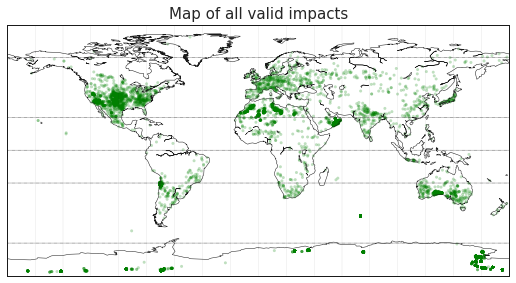

In [ ]:
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.5)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6) #plotting equator and tropics and polar circles

x, y = map(df.reclong,df.reclat)

map.scatter(x, y, marker='.',alpha=0.25,c='green',edgecolor='None')
plt.title('Map of all valid impacts', fontsize=15)

Text(0.5, 1.0, 'Heatmap of all meteorite impacts')

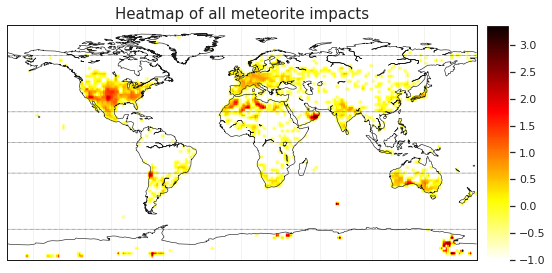

In [ ]:
#creating heatmap
h = plt.hist2d(df.reclong,df.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)

#define map
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)

data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heatmap of all meteorite impacts', fontsize=15)

In [ ]:
# Difference between meteorite seen falling vs found
df_fell = df.groupby('fall').get_group('Fell')
df_found = df.groupby('fall').get_group('Found')

Text(0.5, 1.0, 'Heatmap of meteorites found')

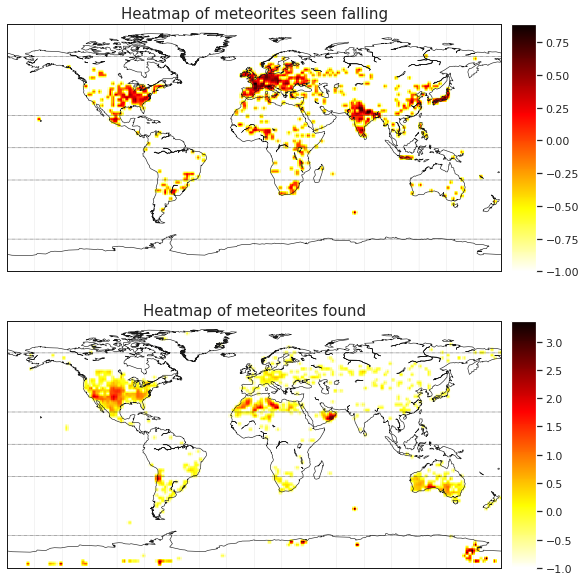

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(211)
h = plt.hist2d(df_fell.reclong,df_fell.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)

map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)

data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heatmap of meteorites seen falling', fontsize=15)

plt.subplot(212)
h = plt.hist2d(df_found.reclong,df_found.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)

map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)

data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heatmap of meteorites found', fontsize=15)

Historical data analysis and visualizations

(1920, 2020)

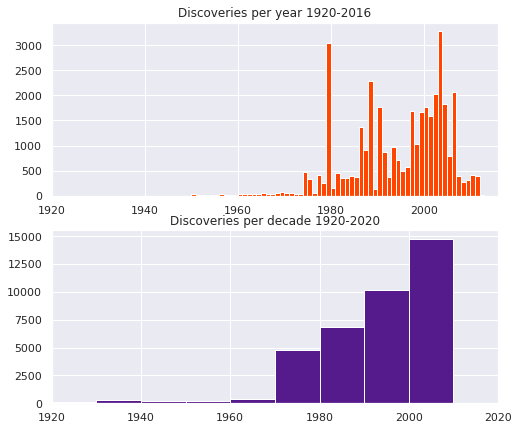

In [ ]:
plt.subplot(211)
df.year.hist(bins=np.arange(1950,2016,1),figsize=(8,7),color="#FF4500")
plt.title('Discoveries per year 1920-2016')
plt.xlim(1920,2016)

plt.subplot(212)
df.year.hist(bins=np.arange(1920,2020,10),figsize=(8,7),color="#551a8b")
plt.title('Discoveries per decade 1920-2020')
plt.xlim(1920,2020)

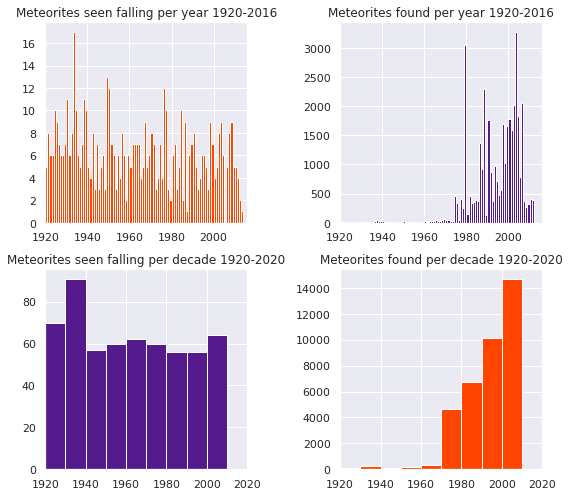

In [ ]:
plt.subplot(221)
df_fell.year.hist(bins=np.arange(1920,2016,1),figsize=(8,7),color="#FF4500")
plt.title('Meteorites seen falling per year 1920-2016')
plt.xlim(1920,2016)

plt.subplot(222)
df_found.year.hist(bins=np.arange(1920,2016,1),figsize=(8,7),color="#551a8b")
plt.title('Meteorites found per year 1920-2016')
plt.xlim(1920,2016)

plt.subplot(223)
df_fell.year.hist(bins=np.arange(1920,2020,10),figsize=(8,7),color="#551a8b")
plt.title('Meteorites seen falling per decade 1920-2020')
plt.xlim(1920,2020)

plt.subplot(224)
df_found.year.hist(bins=np.arange(1920,2020,10),figsize=(8,7),color="#FF4500")
plt.title('Meteorites found per decade 1920-2020')
plt.xlim(1920,2020)

plt.tight_layout()

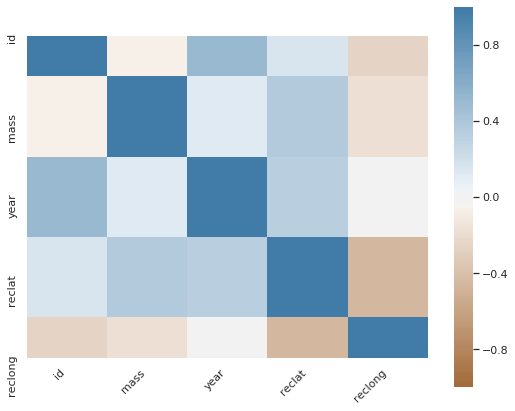

In [ ]:
corr = df_clean.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(40, 240, n=1000),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The rate of meteorites seen falling is surprisingly constant over the last century considering the increase of population worldwide. Nonetheless it could be explained by an increase in density and not in spread.

We can also have a look at the number of discoveries as a function of the latitude...

Text(0.5, 1.0, 'Meteorite recorded latitude vs year')

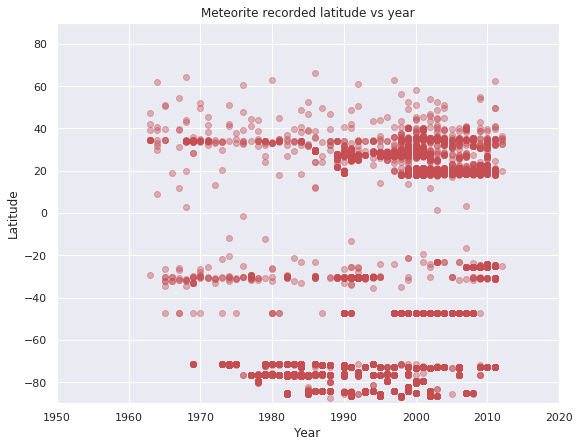

In [ ]:
plt.scatter(df_clean.year,df_clean.reclat,color='r',alpha=0.4)
plt.xlim(1950,2020)
plt.ylim(-90,90)
plt.ylabel('Latitude')
plt.xlabel('Year')
plt.title('Meteorite recorded latitude vs year')

In [ ]:
from scipy.stats import pearsonr


In [ ]:
corr,pval = pearsonr(df_clean['reclat'],df_clean['year'])
print("Correlation coefficient",corr)
if(corr > 0):
  print("Theres a positive linear relationship between latitude and year")
elif(corr == 0):
  print("Theres no relationship between latitude and year")
else:
  print("Theres a negative linear relationship between latitude and year")  

Correlation coefficient 0.33513602133631953
Theres a positive linear relationship between latitude and year


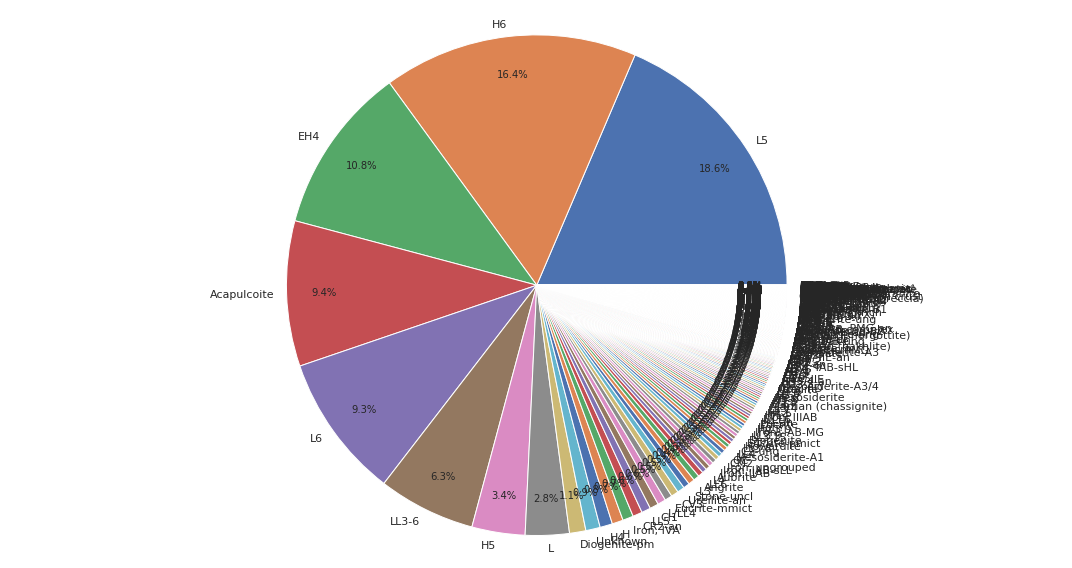

In [ ]:
#show distribution of different meteorite classes
labels = df['recclass'].unique()
sizes = df['recclass'].value_counts()
plt.figure(figsize=(15,8))
plt.pie(sizes,autopct='%0.1f%%',labels = labels,pctdistance=0.85,labeldistance=1.05,radius = 8)
plt.rcParams['font.size'] = 10
plt.axis('equal')
plt.tight_layout()
plt.show()

It is clear from the pie chart distribution, majority of the population are variants of L,LL and H class, which is are the most common classes of chondrite meteorite. Therefore all subclasses of L,LL and H will be combined, the outliers will go to Others class

In [ ]:
df2 = df.copy()
LL = set(df2[df2.recclass.str.startswith("LL")]['recclass'])
L = set(df2[df2.recclass.str.startswith("L")]['recclass'])
L = L-LL
H = set(df2[df2.recclass.str.startswith("H")]['recclass'])
others = set(df2.recclass.values)
others = others - L - LL - H
LL = list(LL)
L = list(L)
H = list(H)
others = list(others)

In [ ]:
df2.recclass.replace(to_replace=LL, value="LL",inplace=True)
df2.recclass.replace(to_replace=L, value="L",inplace=True)
df2.recclass.replace(to_replace=H, value="H",inplace=True)
df2.recclass.replace(to_replace=others, value="others",inplace=True)

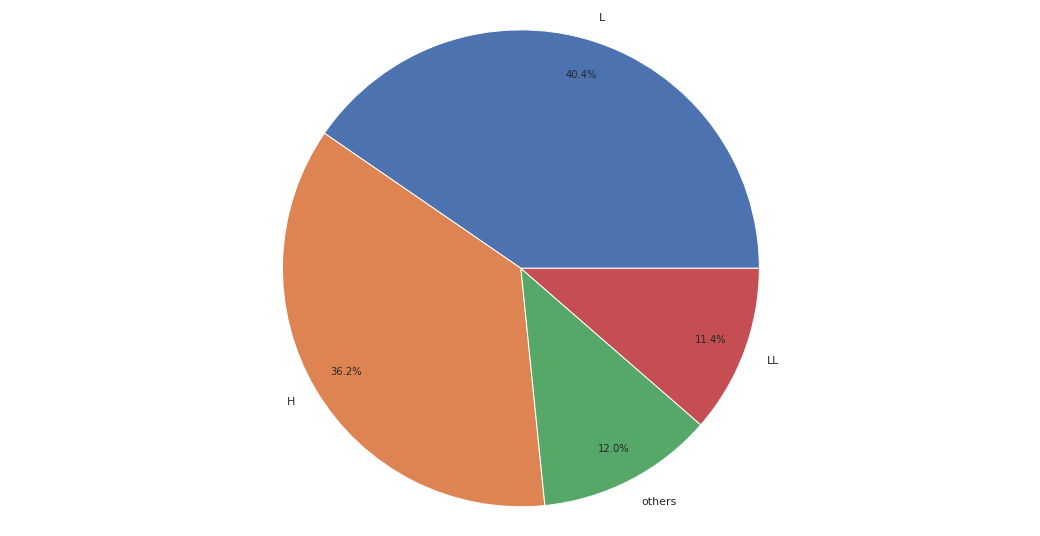

In [ ]:
labels = df2['recclass'].unique()
sizes = df2['recclass'].value_counts()
plt.figure(figsize=(15,8))
plt.pie(sizes,autopct='%0.1f%%',labels = labels,pctdistance=0.85,labeldistance=1.1,radius = 8)
plt.rcParams['font.size'] = 25
plt.axis('equal')
plt.tight_layout()
plt.show()

#Hypothesis testing
#H0:
The difference between mean of sample mass and population mass mass is a statistical fluctuation
#H1:
The difference between mean of sample mass and population mass mass is significatn and not a mere case of statistical fluctuation

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
df_sample = df.sample(500)
pop_mean_mass = df['mass'].mean()
sam_mean_mass = df_sample['mass'].mean()
print("Population mean mass is ",pop_mean_mass)
print("Sample mean mass is ",sam_mean_mass)

tstat,pval = ztest(x1=df_sample['mass'],alternative='two-sided',value= pop_mean_mass)
print("tstat,pval = ",tstat,pval)
if pval <0.05:
  print("we failt to accept null hypothesis")
else:
  print("we accept null hypothesis")

Population mean mass is  15401.620808210922
Sample mean mass is  1811.5074034070917
tstat,pval =  -19.816857070757415 2.1300305066071563e-87
we failt to accept null hypothesis


Correlation between columns

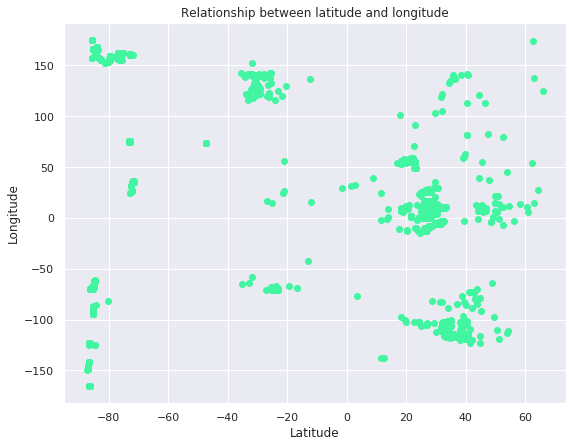

In [ ]:
plt.scatter(df_clean['reclat'],df_clean['reclong'], c= "#42f5a1")
plt.title("Relationship between latitude and longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
corr,pval = pearsonr(df_clean['reclat'],df_clean['reclong'])
print(corr,pval)
if(corr > 0):
  print("Theres a positive linear relationship between latitude and longitude")
elif(corr == 0):
  print("Theres no relationship between latitude and longtitude")
else:
  print("Theres a negative linear relationship between latitude and longitude")    

-0.4579044464612896 0.0
Theres a negative linear relationship between latitude and longitude
